In [1]:
import pandas as pd     #For general purpose Data Manipulation
import numpy as np  #For some operations - creating vectors and matrices/log transformation
from matplotlib import pyplot as plt #Plotting Box-Whisker --> Outlier Detection
import seaborn as sns  #Plotting Box-Whisker and others
from sklearn.model_selection import train_test_split #For Building Train and Test Set
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error


In [2]:
#Loading Data into a DataFrame
FoodDelvery_DF=pd.read_excel('C:/Users/Amruth PC/Desktop/Hackathon/Participants Data/Data_Train.xlsx',converters={'Average_Cost':lambda x:x.replace('₹','').replace(',',''),'Minimum_Order':lambda y:y.replace('₹','').replace(',',''),'Rating':lambda z: np.nan if z=='-' else z,'Votes':lambda k: np.nan if k=='-' else k,'Reviews':lambda l:np.nan if l=='-' else l})
FoodDelvery_DF

Restaurant                                          Location  \
0        ID_6321               FTI College, Law College Road, Pune   
1        ID_2882                              Sector 3, Marathalli   
2        ID_1595                                    Mumbai Central   
3        ID_5929                                   Sector 1, Noida   
4        ID_6123                Rmz Centennial, I Gate, Whitefield   
5        ID_5221                Rmz Centennial, I Gate, Whitefield   
6        ID_3777                                    Mumbai Central   
7         ID_745                        Delhi University-GTB Nagar   
8        ID_2970                        Delhi University-GTB Nagar   
9        ID_3474                                   Sector 1, Noida   
10       ID_5159                                    Mumbai Central   
11       ID_1696                       Yerawada, Pune, Maharashtra   
12       ID_1156                                   Sector 1, Noida   
13        ID_354                        Delhi University-GTB Nagar   
14       ID_6891              Delhi Administration Flats, Timarpur   
15       ID_6406                                  Moulali, Kolkata   
16       ID_2141                                   Sector 1, Noida   
17       ID_3355                    Dockyard Road, Mumbai CST Area   
18       ID_5262                                   Pune University   
19       ID_8148        Gora Bazar, Rajbari, North Dumdum, Kolkata   
20       ID_1681                         D-Block, Sector 63, Noida   
21       ID_3994                                  Sector 14, Noida   
22       ID_4012                         D-Block, Sector 63, Noida   
23        ID_240                         D-Block, Sector 63, Noida   
24       ID_4751                              Sector 3, Marathalli   
25       ID_4944        Mico Layout, Stage 2, BTM Layout,Bangalore   
26       ID_7029                         D-Block, Sector 63, Noida   
27       ID_6769                                    Mumbai Central   
28       ID_5547                    Dockyard Road, Mumbai CST Area   
29       ID_1957                                   Sector 1, Noida   
...          ...                                               ...   
11064    ID_7873                                      Delhi Cantt.   
11065    ID_5538                   Musi Nagar, Malakpet, Hyderabad   
11066    ID_7358                        Babarpur, New Delhi, Delhi   
11067    ID_3388                Chatta Bazaar, Malakpet, Hyderabad   
11068    ID_8063                        Delhi University-GTB Nagar   
11069    ID_2116              Delhi Administration Flats, Timarpur   
11070    ID_2261                                   Sector 1, Noida   
11071    ID_3344        Mico Layout, Stage 2, BTM Layout,Bangalore   
11072      ID_46                        Delhi University-GTB Nagar   
11073    ID_6038                 Nathan Road, Mangaldas Road, Pune   
11074    ID_5777                   Musi Nagar, Malakpet, Hyderabad   
11075    ID_8576        Mico Layout, Stage 2, BTM Layout,Bangalore   
11076    ID_1795                         D-Block, Sector 63, Noida   
11077    ID_4036                                  Sector 14, Noida   
11078    ID_6806                               Raja Bazar, Kolkata   
11079    ID_6720              Delhi Administration Flats, Timarpur   
11080     ID_646                                   Sector 1, Noida   
11081    ID_5239                        Delhi University-GTB Nagar   
11082    ID_1434  Laxman Vihar Industrial Area, Sector 3A, Gurgoan   
11083    ID_6048                 Nathan Road, Mangaldas Road, Pune   
11084     ID_968              Delhi Administration Flats, Timarpur   
11085    ID_2394                                          Majestic   
11086    ID_2050               FTI College, Law College Road, Pune   
11087    ID_1309                    Dockyard Road, Mumbai CST Area   
11088     ID_944                Rmz Centennial, I Gate, Whitefield   
11089    ID_8067

In [3]:
FoodDelvery_DF.head()

Restaurant                             Location  \
0    ID_6321  FTI College, Law College Road, Pune   
1    ID_2882                 Sector 3, Marathalli   
2    ID_1595                       Mumbai Central   
3    ID_5929                      Sector 1, Noida   
4    ID_6123   Rmz Centennial, I Gate, Whitefield   

                                 Cuisines Average_Cost Minimum_Order Rating  \
0  Fast Food, Rolls, Burger, Salad, Wraps          200            50    3.5   
1                     Ice Cream, Desserts          100            50    3.5   
2         Italian, Street Food, Fast Food          150            50    3.6   
3          Mughlai, North Indian, Chinese          250            99    3.7   
4                         Cafe, Beverages          200            99    3.2   

  Votes Reviews Delivery_Time  
0    12       4    30 minutes  
1    11       4    30 minutes  
2    99      30    65 minutes  
3   176      95    30 minutes  
4   521     235    65 minutes

In [4]:
FoodDelvery_DF['Average_Cost']=FoodDelvery_DF['Average_Cost'].replace('for',0)

In [5]:
FoodDelvery_DF['Average_Cost'].unique()

array(['200', '100', '150', '250', '650', '350', '800', '50', '400',
       '600', '300', '750', '450', '550', '1000', '500', '900', '1200',
       '950', '850', '700', '1150', 0, '1100', '1400', '2050'],
      dtype=object)

In [6]:
FoodDelvery_DF['Average_Cost']=pd.to_numeric(FoodDelvery_DF['Average_Cost'])

In [7]:
FoodDelvery_DF['Average_Cost']=FoodDelvery_DF['Average_Cost'].replace(0,FoodDelvery_DF['Average_Cost'].mean())

In [8]:
FoodDelvery_DF['Average_Cost'].unique()

array([ 200.        ,  100.        ,  150.        ,  250.        ,
        650.        ,  350.        ,  800.        ,   50.        ,
        400.        ,  600.        ,  300.        ,  750.        ,
        450.        ,  550.        , 1000.        ,  500.        ,
        900.        , 1200.        ,  950.        ,  850.        ,
        700.        , 1150.        ,  202.69064359, 1100.        ,
       1400.        , 2050.        ])

In [9]:
FoodDelvery_DF['Minimum_Order']=pd.to_numeric(FoodDelvery_DF['Minimum_Order'])

In [10]:
FoodDelvery_DF['Rating']=FoodDelvery_DF['Rating'].replace('NEW',np.nan).replace('Opening Soon',np.nan).replace('Temporarily Closed',np.nan)

In [11]:
FoodDelvery_DF['Rating']=pd.to_numeric(FoodDelvery_DF['Rating'])

In [12]:
FoodDelvery_DF['Votes']=pd.to_numeric(FoodDelvery_DF['Votes'])

In [13]:
FoodDelvery_DF['Reviews']=pd.to_numeric(FoodDelvery_DF['Reviews'])

In [14]:
FoodDelvery_DF.head()

Restaurant                             Location  \
0    ID_6321  FTI College, Law College Road, Pune   
1    ID_2882                 Sector 3, Marathalli   
2    ID_1595                       Mumbai Central   
3    ID_5929                      Sector 1, Noida   
4    ID_6123   Rmz Centennial, I Gate, Whitefield   

                                 Cuisines  Average_Cost  Minimum_Order  \
0  Fast Food, Rolls, Burger, Salad, Wraps         200.0             50   
1                     Ice Cream, Desserts         100.0             50   
2         Italian, Street Food, Fast Food         150.0             50   
3          Mughlai, North Indian, Chinese         250.0             99   
4                         Cafe, Beverages         200.0             99   

   Rating  Votes  Reviews Delivery_Time  
0     3.5   12.0      4.0    30 minutes  
1     3.5   11.0      4.0    30 minutes  
2     3.6   99.0     30.0    65 minutes  
3     3.7  176.0     95.0    30 minutes  
4     3.2  521.0    235.0    65 minutes

In [15]:
#Profiling helped in understanding the dataset individually on every column 
import pandas_profiling as pd_prof

pd_prof.ProfileReport(FoodDelvery_DF)

In [16]:
dict(FoodDelvery_DF.dtypes)

{'Restaurant': dtype('O'),
 'Location': dtype('O'),
 'Cuisines': dtype('O'),
 'Average_Cost': dtype('float64'),
 'Minimum_Order': dtype('int64'),
 'Rating': dtype('float64'),
 'Votes': dtype('float64'),
 'Reviews': dtype('float64'),
 'Delivery_Time': dtype('O')}

In [17]:
# Creating a new dataset with only numeric columns and variable columns
numeric_var_names=[key for key in dict(FoodDelvery_DF.dtypes) if dict(FoodDelvery_DF.dtypes)[key] in ['float64', 'int64']]
catag_var_names=[key for key in dict(FoodDelvery_DF.dtypes) if dict(FoodDelvery_DF.dtypes)[key] in [ 'O']]
print(numeric_var_names)
print(catag_var_names)

['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews']
['Restaurant', 'Location', 'Cuisines', 'Delivery_Time']


In [18]:
FoodDelvery_DF_num=FoodDelvery_DF[numeric_var_names]
FoodDelvery_DF_num.head(5)

Average_Cost  Minimum_Order  Rating  Votes  Reviews
0         200.0             50     3.5   12.0      4.0
1         100.0             50     3.5   11.0      4.0
2         150.0             50     3.6   99.0     30.0
3         250.0             99     3.7  176.0     95.0
4         200.0             99     3.2  521.0    235.0

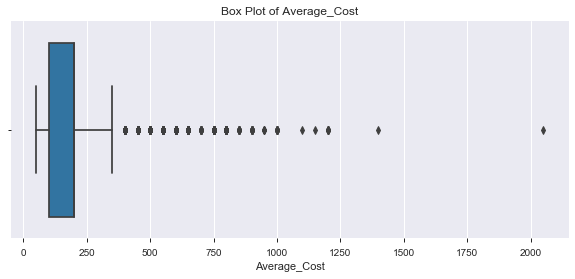

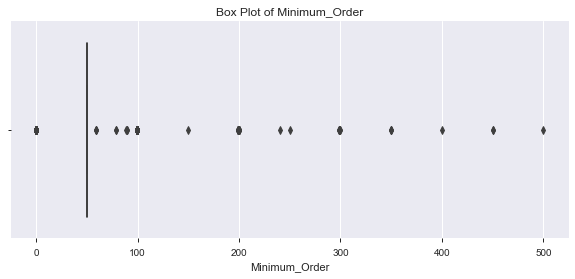

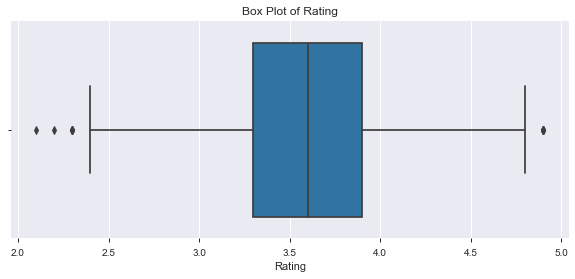

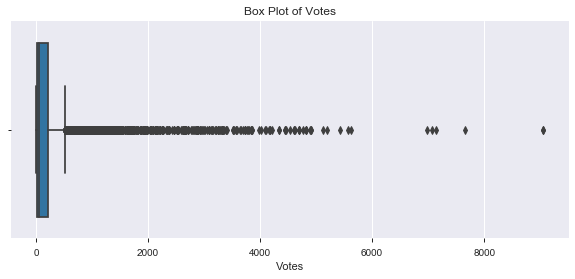

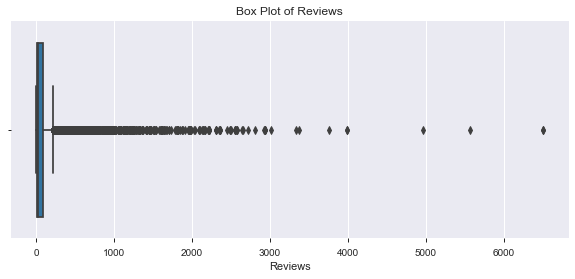

In [19]:
#Checking box lots to undestand the outliers resent in the numerical columns
for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot( x=num_variable, data = FoodDelvery_DF_num)
    plt.title(str('Box Plot of ') + str(num_variable))

In [20]:
#Capping to remove outliers in all numerical columns
def outlier_capping(x):
    ul = x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
    ll = x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))
    x = x.clip_upper(ul)
    x = x.clip_lower(ll)
    return x

FoodDelvery_DF_n=FoodDelvery_DF_num.apply(lambda x: outlier_capping(x))
FoodDelvery_DF_n.head()

Average_Cost  Minimum_Order  Rating  Votes  Reviews
0         200.0             50     3.5   12.0      4.0
1         100.0             50     3.5   11.0      4.0
2         150.0             50     3.6   99.0     30.0
3         250.0             50     3.7  176.0     95.0
4         200.0             50     3.2  511.5    217.0

In [21]:
#Handling missings values - imputing with the mean
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

FoodDelvery_DF_n=FoodDelvery_DF_n.apply(lambda x: Missing_imputation(x))

In [22]:
#Using profile to check the change after imputation
pd_prof.ProfileReport(FoodDelvery_DF_n)

In [23]:
FoodDelvery_DF_n.head()

Average_Cost  Minimum_Order  Rating  Votes  Reviews
0         200.0             50     3.5   12.0      4.0
1         100.0             50     3.5   11.0      4.0
2         150.0             50     3.6   99.0     30.0
3         250.0             50     3.7  176.0     95.0
4         200.0             50     3.2  511.5    217.0

In [24]:
FoodDelvery_DF_cat=FoodDelvery_DF[catag_var_names]
FoodDelvery_DF_cat.head()

Restaurant                             Location  \
0    ID_6321  FTI College, Law College Road, Pune   
1    ID_2882                 Sector 3, Marathalli   
2    ID_1595                       Mumbai Central   
3    ID_5929                      Sector 1, Noida   
4    ID_6123   Rmz Centennial, I Gate, Whitefield   

                                 Cuisines Delivery_Time  
0  Fast Food, Rolls, Burger, Salad, Wraps    30 minutes  
1                     Ice Cream, Desserts    30 minutes  
2         Italian, Street Food, Fast Food    65 minutes  
3          Mughlai, North Indian, Chinese    30 minutes  
4                         Cafe, Beverages    65 minutes

In [25]:
new = FoodDelvery_DF_cat["Cuisines"].str.split(",", n = 8, expand = True)

In [26]:
new.head()

0              1           2       3       4     5     6     7
0  Fast Food          Rolls      Burger   Salad   Wraps  None  None  None
1  Ice Cream       Desserts        None    None    None  None  None  None
2    Italian    Street Food   Fast Food    None    None  None  None  None
3    Mughlai   North Indian     Chinese    None    None  None  None  None
4       Cafe      Beverages        None    None    None  None  None  None

In [27]:
ls=[]
onehot_data=pd.get_dummies(new)
col=onehot_data.columns

In [28]:
lista=[]
for i in col:
    lista.append(i.split('_')[0].strip()+'_'+i.split('_')[1].strip())

In [29]:
onehot_data.columns=lista

In [30]:
onehot_data.head()

0_Afghan  0_African  0_American  0_Andhra  0_Arabian  0_Asian  0_Assamese  \
0         0          0           0         0          0        0           0   
1         0          0           0         0          0        0           0   
2         0          0           0         0          0        0           0   
3         0          0           0         0          0        0           0   
4         0          0           0         0          0        0           0   

   0_Awadhi  0_BBQ  0_Bakery  ...  7_Desserts  7_Fast Food  7_Healthy Food  \
0         0      0         0  ...           0            0               0   
1         0      0         0  ...           0            0               0   
2         0      0         0  ...           0            0               0   
3         0      0         0  ...           0            0               0   
4         0      0         0  ...           0            0               0   

   7_Ice Cream  7_Japanese  7_Kerala  7_Momos  7_Mughlai  7_Pizza  7_Sandwich  
0            0           0         0        0          0        0           0  
1            0           0         0        0          0        0           0  
2            0           0         0        0          0        0           0  
3            0           0         0        0          0        0           0  
4            0           0         0        0          0        0           0  

[5 rows x 461 columns]

In [31]:
list1=[]
list2=[]
for i in lista:
    if(i.split('_')[0]=='0'):
        list1.append(i)
    else:
        list2.append(i)
        

In [32]:
len(list2)+len(list1)

461

In [33]:
list3=[]
for i in list1:
    summed=[]
    summed=onehot_data[i]
    for j in list2:
        if(i.split('_')[1]==j.split('_')[1]):
            summed=summed+onehot_data[j]
    onehot_data[i.split('_')[1]]=summed
        
            

In [34]:
onehot_data.drop(lista,axis=1, inplace = True)

In [35]:
onehot_data.head()

Afghan  African  American  Andhra  Arabian  Asian  Assamese  Awadhi  BBQ  \
0       0        0         0       0        0      0         0       0    0   
1       0        0         0       0        0      0         0       0    0   
2       0        0         0       0        0      0         0       0    0   
3       0        0         0       0        0      0         0       0    0   
4       0        0         0       0        0      0         0       0    0   

   Bakery  ...  South Indian  Street Food  Sushi  Tamil  Tea  Thai  Tibetan  \
0       0  ...             0            0      0      0    0     0        0   
1       0  ...             0            0      0      0    0     0        0   
2       0  ...             0            1      0      0    0     0        0   
3       0  ...             0            0      0      0    0     0        0   
4       0  ...             0            0      0      0    0     0        0   

   Turkish  Vietnamese  Wraps  
0        0           0      1  
1        0           0      0  
2        0           0      0  
3        0           0      0  
4        0           0      0  

[5 rows x 85 columns]

In [36]:
FoodDelvery_DF_cat.drop('Cuisines',axis=1, inplace = True)
FoodDelvery_DF_cat = pd.concat([FoodDelvery_DF_cat, onehot_data], axis=1)

In [37]:
FoodDelvery_DF_cat

Restaurant                                          Location  \
0        ID_6321               FTI College, Law College Road, Pune   
1        ID_2882                              Sector 3, Marathalli   
2        ID_1595                                    Mumbai Central   
3        ID_5929                                   Sector 1, Noida   
4        ID_6123                Rmz Centennial, I Gate, Whitefield   
5        ID_5221                Rmz Centennial, I Gate, Whitefield   
6        ID_3777                                    Mumbai Central   
7         ID_745                        Delhi University-GTB Nagar   
8        ID_2970                        Delhi University-GTB Nagar   
9        ID_3474                                   Sector 1, Noida   
10       ID_5159                                    Mumbai Central   
11       ID_1696                       Yerawada, Pune, Maharashtra   
12       ID_1156                                   Sector 1, Noida   
13        ID_354                        Delhi University-GTB Nagar   
14       ID_6891              Delhi Administration Flats, Timarpur   
15       ID_6406                                  Moulali, Kolkata   
16       ID_2141                                   Sector 1, Noida   
17       ID_3355                    Dockyard Road, Mumbai CST Area   
18       ID_5262                                   Pune University   
19       ID_8148        Gora Bazar, Rajbari, North Dumdum, Kolkata   
20       ID_1681                         D-Block, Sector 63, Noida   
21       ID_3994                                  Sector 14, Noida   
22       ID_4012                         D-Block, Sector 63, Noida   
23        ID_240                         D-Block, Sector 63, Noida   
24       ID_4751                              Sector 3, Marathalli   
25       ID_4944        Mico Layout, Stage 2, BTM Layout,Bangalore   
26       ID_7029                         D-Block, Sector 63, Noida   
27       ID_6769                                    Mumbai Central   
28       ID_5547                    Dockyard Road, Mumbai CST Area   
29       ID_1957                                   Sector 1, Noida   
...          ...                                               ...   
11064    ID_7873                                      Delhi Cantt.   
11065    ID_5538                   Musi Nagar, Malakpet, Hyderabad   
11066    ID_7358                        Babarpur, New Delhi, Delhi   
11067    ID_3388                Chatta Bazaar, Malakpet, Hyderabad   
11068    ID_8063                        Delhi University-GTB Nagar   
11069    ID_2116              Delhi Administration Flats, Timarpur   
11070    ID_2261                                   Sector 1, Noida   
11071    ID_3344        Mico Layout, Stage 2, BTM Layout,Bangalore   
11072      ID_46                        Delhi University-GTB Nagar   
11073    ID_6038                 Nathan Road, Mangaldas Road, Pune   
11074    ID_5777                   Musi Nagar, Malakpet, Hyderabad   
11075    ID_8576        Mico Layout, Stage 2, BTM Layout,Bangalore   
11076    ID_1795                         D-Block, Sector 63, Noida   
11077    ID_4036                                  Sector 14, Noida   
11078    ID_6806                               Raja Bazar, Kolkata   
11079    ID_6720              Delhi Administration Flats, Timarpur   
11080     ID_646                                   Sector 1, Noida   
11081    ID_5239                        Delhi University-GTB Nagar   
11082    ID_1434  Laxman Vihar Industrial Area, Sector 3A, Gurgoan   
11083    ID_6048                 Nathan Road, Mangaldas Road, Pune   
11084     ID_968              Delhi Administration Flats, Timarpur   
11085    ID_2394                                          Majestic   
11086    ID_2050               FTI College, Law College Road, Pune   
11087    ID_1309                    Dockyard Road, Mumbai CST Area   
11088     ID_944                Rmz Centennial, I Gate, Whitefield   
11089    ID_8067

In [38]:
len(FoodDelvery_DF_cat['Location'].unique())

35

In [39]:
#Model after control the skewness
FoodDelvery_DF_Main = pd.concat([FoodDelvery_DF_n, FoodDelvery_DF_cat], axis=1)
FoodDelvery_DF_Main.head()

Average_Cost  Minimum_Order  Rating  Votes  Reviews Restaurant  \
0         200.0             50     3.5   12.0      4.0    ID_6321   
1         100.0             50     3.5   11.0      4.0    ID_2882   
2         150.0             50     3.6   99.0     30.0    ID_1595   
3         250.0             50     3.7  176.0     95.0    ID_5929   
4         200.0             50     3.2  511.5    217.0    ID_6123   

                              Location Delivery_Time  Afghan  African  ...  \
0  FTI College, Law College Road, Pune    30 minutes       0        0  ...   
1                 Sector 3, Marathalli    30 minutes       0        0  ...   
2                       Mumbai Central    65 minutes       0        0  ...   
3                      Sector 1, Noida    30 minutes       0        0  ...   
4   Rmz Centennial, I Gate, Whitefield    65 minutes       0        0  ...   

   South Indian  Street Food  Sushi  Tamil  Tea  Thai  Tibetan  Turkish  \
0             0            0      0      0    0     0        0        0   
1             0            0      0      0    0     0        0        0   
2             0            1      0      0    0     0        0        0   
3             0            0      0      0    0     0        0        0   
4             0            0      0      0    0     0        0        0   

   Vietnamese  Wraps  
0           0      1  
1           0      0  
2           0      0  
3           0      0  
4           0      0  

[5 rows x 93 columns]

In [40]:
FoodDelvery_DF_Main.columns

Index(['Average_Cost', 'Minimum_Order', 'Rating', 'Votes', 'Reviews',
       'Restaurant', 'Location', 'Delivery_Time', 'Afghan', 'African',
       'American', 'Andhra', 'Arabian', 'Asian', 'Assamese', 'Awadhi', 'BBQ',
       'Bakery', 'Bar Food', 'Bengali', 'Beverages', 'Bihari', 'Biryani',
       'Bohri', 'Brazilian', 'Bubble Tea', 'Burger', 'Cafe', 'Chettinad',
       'Chinese', 'Coffee', 'Continental', 'Desserts', 'European', 'Fast Food',
       'Finger Food', 'French', 'Frozen Yogurt', 'German', 'Goan', 'Gujarati',
       'Healthy Food', 'Hot dogs', 'Hyderabadi', 'Ice Cream', 'Indian',
       'Iranian', 'Italian', 'Japanese', 'Juices', 'Kashmiri', 'Kebab',
       'Kerala', 'Konkan', 'Korean', 'Lebanese', 'Lucknowi', 'Maharashtrian',
       'Malaysian', 'Malwani', 'Mangalorean', 'Mediterranean', 'Mexican',
       'Middle Eastern', 'Mishti', 'Mithai', 'Modern Indian', 'Momos',
       'Mughlai', 'Naga', 'North Eastern', 'North Indian', 'Odia', 'Paan',
       'Parsi', 'Pizza', 'Portug

In [41]:
FoodDelvery_DF_Main.drop(['Minimum_Order','Votes','Restaurant'],axis=1, inplace = True)

In [42]:
FoodDelvery_DF_Main.columns

Index(['Average_Cost', 'Rating', 'Reviews', 'Location', 'Delivery_Time',
       'Afghan', 'African', 'American', 'Andhra', 'Arabian', 'Asian',
       'Assamese', 'Awadhi', 'BBQ', 'Bakery', 'Bar Food', 'Bengali',
       'Beverages', 'Bihari', 'Biryani', 'Bohri', 'Brazilian', 'Bubble Tea',
       'Burger', 'Cafe', 'Chettinad', 'Chinese', 'Coffee', 'Continental',
       'Desserts', 'European', 'Fast Food', 'Finger Food', 'French',
       'Frozen Yogurt', 'German', 'Goan', 'Gujarati', 'Healthy Food',
       'Hot dogs', 'Hyderabadi', 'Ice Cream', 'Indian', 'Iranian', 'Italian',
       'Japanese', 'Juices', 'Kashmiri', 'Kebab', 'Kerala', 'Konkan', 'Korean',
       'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malaysian', 'Malwani',
       'Mangalorean', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Mishti',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'Naga', 'North Eastern',
       'North Indian', 'Odia', 'Paan', 'Parsi', 'Pizza', 'Portuguese',
       'Rajasthani', 'Raw Meats', 'Rolls

In [43]:
X=FoodDelvery_DF_Main[['Average_Cost', 'Rating', 'Reviews', 'Location', 'Afghan', 'African', 'American', 'Andhra', 'Arabian',
       'Asian', 'Assamese', 'Awadhi', 'BBQ', 'Bakery', 'Bar Food', 'Bengali',
       'Beverages', 'Bihari', 'Biryani', 'Bohri', 'Brazilian', 'Bubble Tea',
       'Burger', 'Cafe', 'Chettinad', 'Chinese', 'Coffee', 'Continental',
       'Desserts', 'European', 'Fast Food', 'Finger Food', 'French',
       'Frozen Yogurt', 'German', 'Goan', 'Gujarati', 'Healthy Food',
       'Hot dogs', 'Hyderabadi', 'Ice Cream', 'Indian', 'Iranian', 'Italian',
       'Japanese', 'Juices', 'Kashmiri', 'Kebab', 'Kerala', 'Konkan', 'Korean',
       'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malaysian', 'Malwani',
       'Mangalorean', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Mishti',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'Naga', 'North Eastern',
       'North Indian', 'Odia', 'Paan', 'Parsi', 'Pizza', 'Portuguese',
       'Rajasthani', 'Raw Meats', 'Rolls', 'Salad', 'Sandwich', 'Seafood',
       'South Indian', 'Street Food', 'Sushi', 'Tamil', 'Tea', 'Thai',
       'Tibetan', 'Turkish', 'Vietnamese', 'Wraps']]
Y=FoodDelvery_DF_Main[['Delivery_Time']]

In [44]:
#Applying Label encoding on the categorical columns
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
Y['Delivery_Time']=labelencoder_X.fit_transform(Y['Delivery_Time'])
# Get one hot encoding of columns B
one_hot = pd.get_dummies(X['Location'], prefix = 'Location')
# Drop column B as it is now encoded
X = X.drop('Location',axis = 1)
# Join the encoded df
X = X.join(one_hot)



In [45]:
X.head()

Average_Cost  Rating  Reviews  Afghan  African  American  Andhra  Arabian  \
0         200.0     3.5      4.0       0        0         0       0        0   
1         100.0     3.5      4.0       0        0         0       0        0   
2         150.0     3.6     30.0       0        0         0       0        0   
3         250.0     3.7     95.0       0        0         0       0        0   
4         200.0     3.2    217.0       0        0         0       0        0   

   Asian  Assamese  ...  Location_Raja Bazar, Kolkata  \
0      0         0  ...                             0   
1      0         0  ...                             0   
2      0         0  ...                             0   
3      0         0  ...                             0   
4      0         0  ...                             0   

   Location_Rmz Centennial, I Gate, Whitefield  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            1   

   Location_Sandhurst Road, Mumbai CST Area  Location_Sector 1, Noida  \
0                                         0                         0   
1                                         0                         0   
2                                         0                         0   
3                                         0                         1   
4                                         0                         0   

   Location_Sector 14, Noida  Location_Sector 3, Marathalli  \
0                          0                              0   
1                          0                              1   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   Location_Sector 63A,Gurgaon  \
0                            0   
1                            0   
2                            0   
3                            0   
4                            0   

   Location_Tejas Nagar Colony, Wadala West, Mumbai  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Location_Tiretti, Kolkata  Location_Yerawada, Pune, Maharashtra  
0                          0                                     0  
1                          0                                     0  
2                          0                                     0  
3                          0                                     0  
4                          0                                     0  

[5 rows x 123 columns]

In [46]:
Y.head()

Delivery_Time
0              3
1              3
2              5
3              3
4              5

In [47]:
#Spliting the data set into train and test models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=4)

In [48]:
#import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knnclassifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
print(knnclassifier.fit(x_train,y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [49]:
#Predicting the values using KNN Classifier
y_pred=knnclassifier.predict(x_test)

In [50]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("KNN Classifier Score=",knnclassifier.score(x_test,y_test)*100)
cm

KNN Classifier Score= 68.67958539882831


array([[   0,    0,    0,    1,    1,    0,    0],
       [   0,    2,    0,    7,    6,    0,    0],
       [   0,    0,    0,    3,    0,    0,    0],
       [   0,    2,    1, 1272,  164,   18,    0],
       [   0,    1,    0,  316,  229,   18,    0],
       [   0,    2,    0,   96,   54,   21,    0],
       [   0,    0,    0,    2,    3,    0,    0]], dtype=int64)

In [51]:
#Step5-import linear regression
#from sklearn.svm import SVC
#classifier=SVC(kernel='linear',random_state=4)
#print(classifier.fit(x_train,y_train))
#y_pred=classifier.predict(x_test)
#from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,y_pred)
#cm

In [52]:
#classifier.score(x_test,y_test)*100

In [53]:
#Importing all the required API's
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [54]:
# Importing the Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='entropy' )
DTClassifier.fit(x_train,y_train) 
# Predicting the y-values for x_test set
prediction = DTClassifier.predict(x_test)
prediction
# Building the confusion matrix
from sklearn.metrics import confusion_matrix
print("Decision Tree Score=",DTClassifier.score(x_test,y_test)*100)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Decision Tree Score= 69.08517350157729
Confusion Matrix is :
[[   0    0    0    2    0    0    0]
 [   0    4    0    8    1    2    0]
 [   0    0    0    2    1    0    0]
 [   0    4    2 1179  193   79    0]
 [   1    2    2  202  288   69    0]
 [   0    1    0   66   45   61    0]
 [   0    0    0    3    1    0    1]]


In [55]:
#Applying Random Forest on the dataset
RFclassifier=RandomForestClassifier(n_estimators=1000,criterion='entropy')
RFclassifier.fit(x_train,y_train)
#Predicting the y values using random forest classifier for the x_test data
prediction = RFclassifier.predict(x_test)
prediction
from sklearn.metrics import confusion_matrix
print("Random Forest Score=",RFclassifier.score(x_test,y_test)*100)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Random Forest Score= 73.59170797656603
Confusion Matrix is :
[[   0    0    0    1    1    0    0]
 [   0    2    0    9    4    0    0]
 [   0    0    0    3    0    0    0]
 [   0    0    0 1357   89   11    0]
 [   0    1    0  311  241   11    0]
 [   0    0    0   96   44   33    0]
 [   0    0    0    3    2    0    0]]


In [56]:
#Applying Adaboost classifier on the data set
abclassifier=AdaBoostClassifier(n_estimators=1000)
abclassifier.fit(x_train,y_train)
#Predicting the y values using adaboost classifier on x_test set
prediction = abclassifier.predict(x_test)
print("Adaboost Score=",abclassifier.score(x_test,y_test)*100)
prediction = abclassifier.predict(x_test)
prediction
from sklearn.metrics import confusion_matrix
print("Adaboost classifier Score=",abclassifier.score(x_test,y_test)*100)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Adaboost Score= 68.94997746732763
Adaboost classifier Score= 68.94997746732763
Confusion Matrix is :
[[   0    0    0    2    0    0    0]
 [   0    0    0    9    4    0    2]
 [   0    0    0    3    0    0    0]
 [   0    0    0 1270  177    0   10]
 [   0    0    0  296  260    0    8]
 [   0    0    0   75   98    0    0]
 [   0    0    0    1    4    0    0]]


In [57]:
#Applying Gradient boost on the data set
gbclassifier=GradientBoostingClassifier(n_estimators=100)
gbclassifier.fit(x_train,y_train)
#Predicting the y values for x_test set
prediction = gbclassifier.predict(x_test)
prediction
from sklearn.metrics import confusion_matrix
print("Gradiantboost classifier Score=",gbclassifier.score(x_test,y_test)*100)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Gradiantboost classifier Score= 70.93285263632266
Confusion Matrix is :
[[   0    0    0    2    0    0    0]
 [   0    3    0    7    4    1    0]
 [   0    0    0    3    0    0    0]
 [   0    0    0 1346  104    6    1]
 [   0    1    0  336  217   10    0]
 [   0    1    1   88   75    8    0]
 [   0    0    0    2    3    0    0]]


In [58]:
#Applying xgboost classifier on the data set
xgbclassifier=XGBClassifier(n_estimators=1000)
xgbclassifier.fit(x_train,y_train)
#Predicting the y-values for x_test set
prediction = xgbclassifier.predict(x_test)
prediction
#Accuracy calculation
from sklearn.metrics import confusion_matrix
print("XGboost classifier Score=",xgbclassifier.score(x_test,y_test)*100)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

XGboost classifier Score= 71.83415953132042
Confusion Matrix is :
[[   0    0    0    2    0    0    0]
 [   0    4    0    6    4    1    0]
 [   0    0    0    3    0    0    0]
 [   0    0    0 1335  109   13    0]
 [   0    1    1  314  233   15    0]
 [   0    0    0   77   75   21    0]
 [   0    0    0    1    3    0    1]]


In [59]:
import statsmodels.api as sm
regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     13.37
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          1.22e-241
Time:                        22:57:13   Log-Likelihood:                -10601.
No. Observations:               11094   AIC:                         2.145e+04
Df Residuals:                   10971   BIC:                         2.235e+04
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Average_Cost                                                  0.0010      0.000      9.470      0.000       0.001       0.001
Rating                                                       -0.1004      0.022     -4.617      0.000      -0.143      -0.058
Reviews                                                       0.0027      0.000     20.228      0.000       0.002       0.003
Afghan                                                       -0.1602      0.145     -1.105      0.269      -0.444       0.124
African                                                      -0.8933      0.635     -1.407      0.159      -2.138       0.351
American                                                     -0.0557      0.056     -0.992      0.321      -0.166       0.054
Andhra                                                        0.1140      0.069      1.653      0.098      -0.021       0.249
Arabian                                                      -0.0488      0.083     -0.585      0.558      -0.212       0.115
Asian                                                        -0.0307      0.050     -0.617      0.537      -0.128       0.067
Assamese                                                      0.0263      0.451      0.058      0.953      -0.858       0.910
Awadhi                                                       -0.2182      0.179     -1.219      0.223      -0.569       0.133
BBQ                                                           0.0811      0.092      0.884      0.376      -0.099       0.261
Bakery                                                       -0.0627      0.028     -2.261      0.024      -0.117      -0.008
Bar Food                                                     -0.2762      0.150     -1.840      0.066      -0.570       0.018
Bengali                                                      -0.0883      0.063     -1.411      0.158      -0.211       0.034
Beverages                                                    -0.0053      0.020     -0.266      0.790      -0.044       0.034
Bihari                                                        0.0406      0.193      0.211      0.833      -0.337       0.419
Biryani                                                      -0.0304      0.024     -1.276      0.202      -0.077       0.016
Bohri                                                        -0.3748      0.634     -0.592      0.554      -1.617       0.867
Brazilian                                                    -0.2521      0.289     -0.872      0.383      -0.819       0.314
Bubble Tea                                                    0.0135      0.263      0.051      0.959      -0.503       0.530
Burger                                                     

In [60]:
X.drop('Bihari',axis=1, inplace = True)

In [61]:
import statsmodels.api as sm
regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     13.48
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          3.37e-242
Time:                        22:57:13   Log-Likelihood:                -10601.
No. Observations:               11094   AIC:                         2.145e+04
Df Residuals:                   10972   BIC:                         2.234e+04
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Average_Cost                                                  0.0010      0.000      9.475      0.000       0.001       0.001
Rating                                                       -0.1003      0.022     -4.616      0.000      -0.143      -0.058
Reviews                                                       0.0027      0.000     20.229      0.000       0.002       0.003
Afghan                                                       -0.1603      0.145     -1.106      0.269      -0.445       0.124
African                                                      -0.8934      0.635     -1.407      0.159      -2.138       0.351
American                                                     -0.0558      0.056     -0.993      0.321      -0.166       0.054
Andhra                                                        0.1139      0.069      1.652      0.098      -0.021       0.249
Arabian                                                      -0.0490      0.083     -0.588      0.557      -0.213       0.114
Asian                                                        -0.0308      0.050     -0.618      0.537      -0.128       0.067
Assamese                                                      0.0263      0.451      0.058      0.953      -0.858       0.910
Awadhi                                                       -0.2150      0.178     -1.206      0.228      -0.565       0.135
BBQ                                                           0.0811      0.092      0.884      0.376      -0.099       0.261
Bakery                                                       -0.0628      0.028     -2.263      0.024      -0.117      -0.008
Bar Food                                                     -0.2762      0.150     -1.841      0.066      -0.570       0.018
Bengali                                                      -0.0884      0.063     -1.413      0.158      -0.211       0.034
Beverages                                                    -0.0053      0.020     -0.267      0.790      -0.044       0.034
Biryani                                                      -0.0305      0.024     -1.280      0.201      -0.077       0.016
Bohri                                                        -0.3748      0.634     -0.592      0.554      -1.617       0.867
Brazilian                                                    -0.2522      0.289     -0.873      0.383      -0.819       0.314
Bubble Tea                                                    0.0134      0.263      0.051      0.959      -0.503       0.530
Burger                                                       -0.0057      0.038     -0.149      0.881      -0.080       0.069
Cafe                                                       

In [62]:
X.drop('Mithai',axis=1, inplace = True)

In [63]:
import statsmodels.api as sm
regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     13.59
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          1.05e-242
Time:                        22:57:13   Log-Likelihood:                -10601.
No. Observations:               11094   AIC:                         2.144e+04
Df Residuals:                   10973   BIC:                         2.233e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Average_Cost                                                  0.0010      0.000      9.471      0.000       0.001       0.001
Rating                                                       -0.1001      0.022     -4.604      0.000      -0.143      -0.057
Reviews                                                       0.0027      0.000     20.224      0.000       0.002       0.003
Afghan                                                       -0.1609      0.145     -1.109      0.267      -0.445       0.123
African                                                      -0.8929      0.635     -1.407      0.160      -2.137       0.351
American                                                     -0.0560      0.056     -0.997      0.319      -0.166       0.054
Andhra                                                        0.1137      0.069      1.649      0.099      -0.021       0.249
Arabian                                                      -0.0475      0.083     -0.570      0.568      -0.211       0.116
Asian                                                        -0.0309      0.050     -0.621      0.535      -0.129       0.067
Assamese                                                      0.0258      0.451      0.057      0.954      -0.858       0.910
Awadhi                                                       -0.2156      0.178     -1.209      0.227      -0.565       0.134
BBQ                                                           0.0808      0.092      0.881      0.378      -0.099       0.261
Bakery                                                       -0.0623      0.028     -2.247      0.025      -0.117      -0.008
Bar Food                                                     -0.2759      0.150     -1.839      0.066      -0.570       0.018
Bengali                                                      -0.0878      0.063     -1.404      0.160      -0.210       0.035
Beverages                                                    -0.0056      0.020     -0.281      0.779      -0.044       0.033
Biryani                                                      -0.0309      0.024     -1.294      0.196      -0.078       0.016
Bohri                                                        -0.3751      0.633     -0.592      0.554      -1.617       0.867
Brazilian                                                    -0.2525      0.289     -0.874      0.382      -0.819       0.314
Bubble Tea                                                    0.0138      0.263      0.052      0.958      -0.502       0.530
Burger                                                       -0.0060      0.038     -0.157      0.875      -0.081       0.069
Cafe                                                       

In [64]:
X.drop('Chinese',axis=1, inplace = True)

In [65]:
import statsmodels.api as sm
regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     13.71
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          3.33e-243
Time:                        22:57:14   Log-Likelihood:                -10601.
No. Observations:               11094   AIC:                         2.144e+04
Df Residuals:                   10974   BIC:                         2.232e+04
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Average_Cost                                                  0.0010      0.000      9.544      0.000       0.001       0.001
Rating                                                       -0.0992      0.022     -4.574      0.000      -0.142      -0.057
Reviews                                                       0.0027      0.000     20.216      0.000       0.002       0.003
Afghan                                                       -0.1578      0.145     -1.089      0.276      -0.442       0.126
African                                                      -0.8908      0.635     -1.403      0.161      -2.135       0.353
American                                                     -0.0546      0.056     -0.973      0.331      -0.165       0.055
Andhra                                                        0.1137      0.069      1.650      0.099      -0.021       0.249
Arabian                                                      -0.0490      0.083     -0.588      0.557      -0.212       0.114
Asian                                                        -0.0302      0.050     -0.606      0.544      -0.128       0.067
Assamese                                                      0.0304      0.451      0.067      0.946      -0.853       0.914
Awadhi                                                       -0.2152      0.178     -1.207      0.227      -0.565       0.134
BBQ                                                           0.0810      0.092      0.883      0.377      -0.099       0.261
Bakery                                                       -0.0610      0.028     -2.207      0.027      -0.115      -0.007
Bar Food                                                     -0.2741      0.150     -1.827      0.068      -0.568       0.020
Bengali                                                      -0.0881      0.063     -1.409      0.159      -0.211       0.034
Beverages                                                    -0.0047      0.020     -0.238      0.812      -0.043       0.034
Biryani                                                      -0.0298      0.024     -1.255      0.210      -0.076       0.017
Bohri                                                        -0.3724      0.633     -0.588      0.557      -1.614       0.869
Brazilian                                                    -0.2491      0.289     -0.862      0.389      -0.815       0.317
Bubble Tea                                                    0.0142      0.263      0.054      0.957      -0.502       0.530
Burger                                                       -0.0054      0.038     -0.143      0.886      -0.080       0.069
Cafe                                                       

In [66]:
X.drop(['Assamese','Beverages','Bubble Tea','Frozen Yogurt','Korean','Mangalorean','Sandwich'],axis=1, inplace = True)

In [67]:
import statsmodels.api as sm
regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     14.57
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          3.78e-247
Time:                        22:57:14   Log-Likelihood:                -10601.
No. Observations:               11094   AIC:                         2.143e+04
Df Residuals:                   10981   BIC:                         2.226e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Average_Cost                                                  0.0010      0.000      9.557      0.000       0.001       0.001
Rating                                                       -0.0991      0.022     -4.574      0.000      -0.142      -0.057
Reviews                                                       0.0027      0.000     20.240      0.000       0.002       0.003
Afghan                                                       -0.1573      0.145     -1.086      0.277      -0.441       0.127
African                                                      -0.8919      0.634     -1.406      0.160      -2.136       0.352
American                                                     -0.0539      0.056     -0.962      0.336      -0.164       0.056
Andhra                                                        0.1139      0.069      1.653      0.098      -0.021       0.249
Arabian                                                      -0.0487      0.083     -0.585      0.558      -0.212       0.115
Asian                                                        -0.0299      0.049     -0.605      0.545      -0.127       0.067
Awadhi                                                       -0.2160      0.178     -1.212      0.226      -0.565       0.133
BBQ                                                           0.0810      0.092      0.884      0.377      -0.099       0.261
Bakery                                                       -0.0603      0.027     -2.212      0.027      -0.114      -0.007
Bar Food                                                     -0.2742      0.150     -1.829      0.067      -0.568       0.020
Bengali                                                      -0.0873      0.062     -1.399      0.162      -0.210       0.035
Biryani                                                      -0.0296      0.024     -1.244      0.213      -0.076       0.017
Bohri                                                        -0.3715      0.633     -0.587      0.557      -1.613       0.870
Brazilian                                                    -0.2481      0.289     -0.859      0.390      -0.814       0.318
Burger                                                       -0.0070      0.037     -0.188      0.851      -0.080       0.066
Cafe                                                         -0.0103      0.032     -0.319      0.750      -0.073       0.053
Chettinad                                                    -0.2899      0.213     -1.364      0.173      -0.707       0.127
Coffee                                                       -0.2118      0.103     -2.063      0.039      -0.413      -0.011
Continental                                                

In [68]:
#X.drop(['Fast Food','Ice Cream','Malaysian','Paan','Raw Meats'],axis=1, inplace = True)

In [69]:
import statsmodels.api as sm
regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     14.57
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          3.78e-247
Time:                        22:57:14   Log-Likelihood:                -10601.
No. Observations:               11094   AIC:                         2.143e+04
Df Residuals:                   10981   BIC:                         2.226e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Average_Cost                                                  0.0010      0.000      9.557      0.000       0.001       0.001
Rating                                                       -0.0991      0.022     -4.574      0.000      -0.142      -0.057
Reviews                                                       0.0027      0.000     20.240      0.000       0.002       0.003
Afghan                                                       -0.1573      0.145     -1.086      0.277      -0.441       0.127
African                                                      -0.8919      0.634     -1.406      0.160      -2.136       0.352
American                                                     -0.0539      0.056     -0.962      0.336      -0.164       0.056
Andhra                                                        0.1139      0.069      1.653      0.098      -0.021       0.249
Arabian                                                      -0.0487      0.083     -0.585      0.558      -0.212       0.115
Asian                                                        -0.0299      0.049     -0.605      0.545      -0.127       0.067
Awadhi                                                       -0.2160      0.178     -1.212      0.226      -0.565       0.133
BBQ                                                           0.0810      0.092      0.884      0.377      -0.099       0.261
Bakery                                                       -0.0603      0.027     -2.212      0.027      -0.114      -0.007
Bar Food                                                     -0.2742      0.150     -1.829      0.067      -0.568       0.020
Bengali                                                      -0.0873      0.062     -1.399      0.162      -0.210       0.035
Biryani                                                      -0.0296      0.024     -1.244      0.213      -0.076       0.017
Bohri                                                        -0.3715      0.633     -0.587      0.557      -1.613       0.870
Brazilian                                                    -0.2481      0.289     -0.859      0.390      -0.814       0.318
Burger                                                       -0.0070      0.037     -0.188      0.851      -0.080       0.066
Cafe                                                         -0.0103      0.032     -0.319      0.750      -0.073       0.053
Chettinad                                                    -0.2899      0.213     -1.364      0.173      -0.707       0.127
Coffee                                                       -0.2118      0.103     -2.063      0.039      -0.413      -0.011
Continental                                                

In [70]:
#X.drop(['Arabian','BBQ','Bohri','German','Gujarati','Hot dogs','Indian','Iranian','Italian','Juices','Kerala','Malwani','Maharashtrian','Pizza','Rolls','Sushi','Turkish'],axis=1, inplace = True)

In [71]:
import statsmodels.api as sm
regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     14.57
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          3.78e-247
Time:                        22:57:15   Log-Likelihood:                -10601.
No. Observations:               11094   AIC:                         2.143e+04
Df Residuals:                   10981   BIC:                         2.226e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Average_Cost                                                  0.0010      0.000      9.557      0.000       0.001       0.001
Rating                                                       -0.0991      0.022     -4.574      0.000      -0.142      -0.057
Reviews                                                       0.0027      0.000     20.240      0.000       0.002       0.003
Afghan                                                       -0.1573      0.145     -1.086      0.277      -0.441       0.127
African                                                      -0.8919      0.634     -1.406      0.160      -2.136       0.352
American                                                     -0.0539      0.056     -0.962      0.336      -0.164       0.056
Andhra                                                        0.1139      0.069      1.653      0.098      -0.021       0.249
Arabian                                                      -0.0487      0.083     -0.585      0.558      -0.212       0.115
Asian                                                        -0.0299      0.049     -0.605      0.545      -0.127       0.067
Awadhi                                                       -0.2160      0.178     -1.212      0.226      -0.565       0.133
BBQ                                                           0.0810      0.092      0.884      0.377      -0.099       0.261
Bakery                                                       -0.0603      0.027     -2.212      0.027      -0.114      -0.007
Bar Food                                                     -0.2742      0.150     -1.829      0.067      -0.568       0.020
Bengali                                                      -0.0873      0.062     -1.399      0.162      -0.210       0.035
Biryani                                                      -0.0296      0.024     -1.244      0.213      -0.076       0.017
Bohri                                                        -0.3715      0.633     -0.587      0.557      -1.613       0.870
Brazilian                                                    -0.2481      0.289     -0.859      0.390      -0.814       0.318
Burger                                                       -0.0070      0.037     -0.188      0.851      -0.080       0.066
Cafe                                                         -0.0103      0.032     -0.319      0.750      -0.073       0.053
Chettinad                                                    -0.2899      0.213     -1.364      0.173      -0.707       0.127
Coffee                                                       -0.2118      0.103     -2.063      0.039      -0.413      -0.011
Continental                                                

In [72]:
#X.drop(['American','Biryani','Burger','Chettinad','Finger Food','Kashmiri','Mughlai','Portuguese'],axis=1, inplace = True)

In [73]:
#X.drop(['Afghan','Odia'],axis=1, inplace = True)

In [74]:
import statsmodels.api as sm
regg=sm.OLS(endog=Y , exog=X ).fit()
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     14.57
Date:                Mon, 18 Nov 2019   Prob (F-statistic):          3.78e-247
Time:                        22:57:15   Log-Likelihood:                -10601.
No. Observations:               11094   AIC:                         2.143e+04
Df Residuals:                   10981   BIC:                         2.226e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Average_Cost                                                  0.0010      0.000      9.557      0.000       0.001       0.001
Rating                                                       -0.0991      0.022     -4.574      0.000      -0.142      -0.057
Reviews                                                       0.0027      0.000     20.240      0.000       0.002       0.003
Afghan                                                       -0.1573      0.145     -1.086      0.277      -0.441       0.127
African                                                      -0.8919      0.634     -1.406      0.160      -2.136       0.352
American                                                     -0.0539      0.056     -0.962      0.336      -0.164       0.056
Andhra                                                        0.1139      0.069      1.653      0.098      -0.021       0.249
Arabian                                                      -0.0487      0.083     -0.585      0.558      -0.212       0.115
Asian                                                        -0.0299      0.049     -0.605      0.545      -0.127       0.067
Awadhi                                                       -0.2160      0.178     -1.212      0.226      -0.565       0.133
BBQ                                                           0.0810      0.092      0.884      0.377      -0.099       0.261
Bakery                                                       -0.0603      0.027     -2.212      0.027      -0.114      -0.007
Bar Food                                                     -0.2742      0.150     -1.829      0.067      -0.568       0.020
Bengali                                                      -0.0873      0.062     -1.399      0.162      -0.210       0.035
Biryani                                                      -0.0296      0.024     -1.244      0.213      -0.076       0.017
Bohri                                                        -0.3715      0.633     -0.587      0.557      -1.613       0.870
Brazilian                                                    -0.2481      0.289     -0.859      0.390      -0.814       0.318
Burger                                                       -0.0070      0.037     -0.188      0.851      -0.080       0.066
Cafe                                                         -0.0103      0.032     -0.319      0.750      -0.073       0.053
Chettinad                                                    -0.2899      0.213     -1.364      0.173      -0.707       0.127
Coffee                                                       -0.2118      0.103     -2.063      0.039      -0.413      -0.011
Continental                                                

In [75]:
#Spliting the data set into train and test models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=94)

In [76]:
#Applying Random Forest on the dataset
RFclassifier=RandomForestClassifier(n_estimators=1000,criterion='entropy')
RFclassifier.fit(x_train,y_train)
#Predicting the y values using random forest classifier for the x_test data
prediction = RFclassifier.predict(x_test)
prediction
from sklearn.metrics import confusion_matrix
print("Random Forest Score=",RFclassifier.score(x_test,y_test)*100)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Random Forest Score= 74.53808021631365
Confusion Matrix is :
[[   0    0    0    1    0    0    0]
 [   0    2    0    2    3    1    0]
 [   0    0    0    5    1    0    0]
 [   0    0    0 1397   99   10    0]
 [   0    0    0  278  224   19    0]
 [   0    0    0   86   56   31    0]
 [   0    0    0    4    0    0    0]]


In [78]:
ls=X.columns

In [79]:
ls

Index(['Average_Cost', 'Rating', 'Reviews', 'Afghan', 'African', 'American',
       'Andhra', 'Arabian', 'Asian', 'Awadhi',
       ...
       'Location_Raja Bazar, Kolkata',
       'Location_Rmz Centennial, I Gate, Whitefield',
       'Location_Sandhurst Road, Mumbai CST Area', 'Location_Sector 1, Noida',
       'Location_Sector 14, Noida', 'Location_Sector 3, Marathalli',
       'Location_Sector 63A,Gurgaon',
       'Location_Tejas Nagar Colony, Wadala West, Mumbai',
       'Location_Tiretti, Kolkata', 'Location_Yerawada, Pune, Maharashtra'],
      dtype='object', length=113)